INFO 7390

Advances in Data Sciences and Architecture

Exam 1

Student Name: Chung-Yang Li

Professor: Nik Bear Brown

Due: Sunday July 22, 2018


Q1 (20 Points) The stock market is often modeled as a normal distribution; but is closer to a Weibull
distribution. How does a normal distribution differ from a Weibull distribution?
Plot a normal distribution with mean 700 and standard deviation 100. What is the probability of a value being greater than 900?
Use a 2-parameter Weibull distribution to approximate a normal distribution (i.e. find a shape
parameter that has a “bell shape” and a scale parameter to is close the normal above.)
See
https://www.johndcook.com/blog/distributions_scipy/
http://www.niar.wichita.edu/coe/NCAMP_Documents/Publications/NCAMP_Techincal_Presentations/D
istribution_for_small_sample_sizes_and_fatigue_data.pdf
https://stackoverflow.com/questions/17481672/fitting-a-weibull-distribution-using-scipy
http://faculty.washington.edu/fscholz/DATAFILES498B2008/WeibullBounds.pdf
Plot a normal distribution with mean 700 and standard deviation 100 in the same graph as its Weibull
approximation. What is the probability of a value being greater than 900 using the Weibull
approximation?

Weibull distribution is very flexible, and normal distribution does not vary in shape

C:\Users\t0912\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


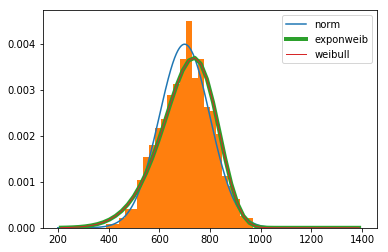

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import norm

u, std = 700, 100 # mean and standard deviation

x_axis = np.arange(200, 1200, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, u, std), label='norm')

data = np.random.normal(u, std, 1000)

# Fit Weibull function, some explanation below
params = stats.exponweib.fit(data, floc=0, f0=1)
shape = params[1]
scale = params[3]

#### Plotting
# Histogram first
values,bins,hist = plt.hist(data,bins=50,range=(200,1400),normed=True)
center = (bins[:-1] + bins[1:]) / 2.

# Using all params and the stats function
plt.plot(center,stats.exponweib.pdf(center,*params),lw=4,label='exponweib')

# Using Weibull function as a check
def weibull(u,shape,scale):
    '''Weibull distribution with shape parameter k and scale parameter A'''
    return (shape / scale) * (u / scale)**(shape-1) * np.exp(-(u/scale)**shape)

plt.plot(center,weibull(center,shape,scale),label='weibull',lw=1)
plt.legend()

# print(stats.exponweib.cdf(center,*params)[30])

In [21]:
def zscore (x,u,std):
    return (x-u)/std

print('P(Z>900) =', 1-st.norm.cdf(zscore(900,700,100)))

P(Z>900) = 0.02275013194817921


In [26]:
print('P(Z>900) =',stats.exponweib.sf(900,*params))

P(Z>900) = 0.015297315335914385


Q2 (20 Points) What is a hypothesis test? What is meant by the null hypothesis and alternative
hypothesis?
How does a z-test differ from a t-test?
Create an example problem using a hypothesis test. It MUST use data that you used in assignment 1, 2
or 3.
Show how to solve the problem with hand calculations.
Show how to solve the problem with python code.

1. 
Null hypothesis (H0)

The null hypothesis states that a population parameter (such as the mean, the standard deviation, and so on) is equal to a hypothesized value. The null hypothesis is often an initial claim that is based on previous analyses or specialized knowledge.
Alternative Hypothesis (H1)

The alternative hypothesis states that a population parameter is smaller, greater, or different than the hypothesized value in the null hypothesis. The alternative hypothesis is what you might believe to be true or hope to prove true.

Z-test variance is given and T-TEST not.

Reference:

https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/null-and-alternative-hypotheses/

https://keydifferences.com/difference-between-t-test-and-z-test.html

In [1]:
import pandas as pd
gamedata = pd.read_csv(r'C:\Users\t0912\1 Jupyter\Exam1\gamedata')
gamedata.drop(gamedata.columns[0], axis=1, inplace=True)
gamedata.head()
gamedata.describe()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000
mean,1928.576993,1.500453,1.482337,1.486866,1.499774,1.041893,1.489357,0.776721,6.152853,1.149683,0.415534,1.468297,0.269928,6.004303,1.141304,0.475770,1.517889,0.253397
std,425.662041,0.500056,0.499745,0.499884,0.500057,0.826959,0.519059,0.824847,3.724177,1.301803,0.612903,1.216121,0.443972,3.828454,1.300738,0.634852,1.229552,0.435005
min,613.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1628.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1895.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,7.000000,1.000000,0.000000,1.000000,0.000000
75%,2203.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,10.000000,2.000000,1.000000,2.000000,1.000000,9.000000,2.000000,1.000000,2.000000,1.000000
max,3933.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,11.000000,9.000000,4.000000,6.000000,1.000000,11.000000,10.000000,3.000000,6.000000,1.000000


In [116]:
gamedata.gameDuration.describe()

count    4416.000000
mean     1928.576993
std       425.662041
min       613.000000
25%      1628.000000
50%      1895.000000
75%      2203.000000
max      3933.000000
Name: gameDuration, dtype: float64

In [42]:
print('game usually last more than', 60*30, 'seconds')
print('H0 =', 60*30)
print('H1 <', 60*30)

game usually last more than 1800 seconds
H0 = 1800
H1 < 1800


In [45]:
import math

print('P(Z>1800) =', 1- st.norm.cdf(zscore(1800,1929,426)))

P(Z>1800) = 0.6189852988283979


Q3 (20 Points) Write an equation for linear regression. Explain how the error is dependent on either the dependent variables? What is the distribution of the error?

1. Linear regression predicts the response variable $y$ assuming it has a linear relationship with predictor variable(s) $x$ or $x_1, x_2, ,,, x_n$.

$$y = \beta_0 + \beta_1 x + \varepsilon .$$

2. statistical independence of the errors (in particular, no correlation between consecutive errors in the case of time series data).

3. normality of the error distribution.

Read to following page on GLMs https://onlinecourses.science.psu.edu/stat504/node/216/
How does generalized linear model (GLM) relate to ordinary linear regression?
What is the relationship between the linear predictor(s) and the mean of the response distribution
function if one models ordinary linear regression as a GLM?
Linear regression assumes that the error of the dependent variable is normally distributed. What would
one do if it is not?

1. A generalized linear model is a flexible generalization of ordinary linear regression models which allows for the response variables (dependent) to have error distribution other than normal distribution

Use a GLM to create generalized linear model assuming the error of the dependent variable is normally
distributed on the same data that you used in the linear regression assignment. How does it compare to
the results in the linear regression assignment?
Relationship between the dependent and independent variables need not be of the simple linear form.
What would one do if it is not?
What is regularization? Why does one use it? Can it be used with a GLM?

Reference:

https://github.com/nikbearbrown/INFO_7390/blob/master/Week_4/NBB_Linear_Regression.ipynb

https://www.quora.com/What-is-the-difference-between-general-linear-models-and-generalized-linear-models

In [3]:
import statsmodels.api as sm

gamedata.t1_inhibitorKills = sm.add_constant(gamedata.t1_inhibitorKills)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(gamedata.gameDuration, gamedata.t1_inhibitorKills, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           gameDuration   No. Observations:                 4416
Model:                            GLM   Df Residuals:                     4415
Model Family:                   Gamma   Df Model:                            0
Link Function:          inverse_power   Scale:                        0.048714
Method:                          IRLS   Log-Likelihood:                -32931.
Date:                Fri, 20 Jul 2018   Deviance:                       217.33
Time:                        14:03:03   Pearson chi2:                     215.
No. Iterations:                     6   Covariance Type:             nonrobust
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
t1_inhibitorKills     0.0005   1.72e-06    301.083      0.000       0.001       0.001


C:\Users\t0912\Anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:302: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Q4 (20 Points) Consider the supervised learning algorithms support vector machines, random forests
and multilayer perceptrons.
What are hyper-parameters?

a hyperparameter is a parameter whose value is set before the learning process begins.

What are the hyper-parameters for the algorithms: 1) support vector machines, 2) random forests and
3) multilayer perceptrons?
Using data, write python code to show the effect of hyper-parameters on each of these algorithms.

in SVM, with higher C(penalty) help to have better accuracy score.
in RF, with differnet n_estimators number, the result just show slightly different.
in MLP, with learning rate 0.1 and 0.01 makes quite different result.

Reference:

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

<h4>Support Vector Machines</h4>

In [46]:
X = gamedata_oneside[['t1_inhibitorKills','t1_towerKills']]
y = gamedata_oneside.winner

X = X.values
y = y.values

In [53]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
X_train_std
y_train

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [85]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', probability = True, C = 1)#C = penalty
svc = svm.fit(X_train_std, y_train)
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
svm.predict(X_test_std)

array([1, 2, 2, ..., 2, 2, 1], dtype=int64)

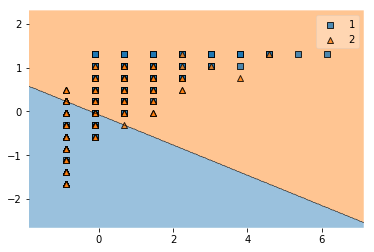

In [69]:
plot_decision_regions(X_train_std, y_train, clf = svm)
plt.show()

In [73]:
from sklearn import metrics

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc,X,y,cv=10).mean())
#SVM metrics
sm = svc.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.9309303208462871
Accuracy score using SVM is 0.9290566037735849


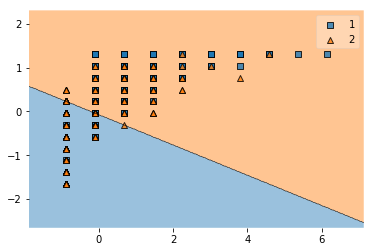

In [97]:
svm2 = SVC(kernel = 'linear', probability = True, C = 10)#C = penalty
svc2 = svm2.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, y_train, clf = svm2)
plt.show()

In [98]:
print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(svc2,X,y,cv=10).mean())
#SVM metrics
sm = svc2.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.9309308338720104
Accuracy score using SVM is 0.9433962264150944


<h4>Random Forests</h4>

In [77]:
RF = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 500,
                                max_features = 2)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RF,X,y,cv=10).mean())

# Random Forest metrics
sm = RF.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.9438421522455137
Accuracy score using Random Forest is 0.9449056603773585


In [109]:
RF2 = RandomForestClassifier(random_state = 42, 
                                criterion='gini',
                                n_estimators = 10,
                                max_features = 2)
                                
# Random Forest cross validation

print("KfoldCrossVal mean score using Random Forest is %s" %cross_val_score(RF2,X,y,cv=10).mean())

# Random Forest metrics
sm = RF2.fit(X_train, y_train)

y_pred = sm.predict(X_test)
print("Accuracy score using Random Forest is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using Random Forest is 0.9438416392197903
Accuracy score using Random Forest is 0.9449056603773585


<h4>MultiLayer Perceptrons</h4>

In [81]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.01)

clf = mlp.fit(X_train, y_train)

print("KfoldCrossVal mean score using MLP is %s" %cross_val_score(mlp,X,y,cv=10).mean())

y_pred = clf.predict(X_test)
print("Accuracy score using MLP is %s" %metrics.accuracy_score(y_test, y_pred))

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.48428258
Iteration 2, loss = 0.37117740
Iteration 3, loss = 0.30601485
Iteration 4, loss = 0.27037628
Iteration 5, loss = 0.24835928
Iteration 6, loss = 0.23500792
Iteration 7, loss = 0.22418185
Iteration 8, loss = 0.21812888
Iteration 9, loss = 0.21146023
Iteration 10, loss = 0.20647166
Iteration 1, loss = 0.47046896
Iteration 2, loss = 0.34043728

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 3, loss = 0.28079359
Iteration 4, loss = 0.24936253
Iteration 5, loss = 0.23243876
Iteration 6, loss = 0.22123136
Iteration 7, loss = 0.21283718
Iteration 8, loss = 0.20752964
Iteration 9, loss = 0.20144300
Iteration 10, loss = 0.19770587
Iteration 1, loss = 0.47034278
Iteration 2, loss = 0.33779363
Iteration 3, loss = 0.27697227
Iteration 4, loss = 0.24523207
Iteration 5, loss = 0.22858681
Iteration 6, loss = 0.21725034
Iteration 7, loss = 0.20845780
Iteration 8, loss = 0.20319445
Iteration 9, loss = 0.19800574
Iteration 10, loss = 0.19331712
Iteration 1, loss = 0.46934695
Iteration 2, loss = 0.33809703
Iteration 3, loss = 0.27813588
Iteration 4, loss = 0.24678048
Iteration 5, loss = 0.23015296
Iteration 6, loss = 0.21792103
Iteration 7, loss = 0.20977984

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 8, loss = 0.20489155
Iteration 9, loss = 0.19886067
Iteration 10, loss = 0.19417284
Iteration 1, loss = 0.47208491
Iteration 2, loss = 0.34188170
Iteration 3, loss = 0.28296212
Iteration 4, loss = 0.25213797
Iteration 5, loss = 0.23540050
Iteration 6, loss = 0.22320656
Iteration 7, loss = 0.21495235
Iteration 8, loss = 0.20959308
Iteration 9, loss = 0.20382207
Iteration 10, loss = 0.19944450
Iteration 1, loss = 0.47104878
Iteration 2, loss = 0.34291360
Iteration 3, loss = 0.28314026
Iteration 4, loss = 0.25252964
Iteration 5, loss = 0.23548970
Iteration 6, loss = 0.22333683
Iteration 7, loss = 0.21427867
Iteration 8, loss = 0.20938407
Iteration 9, loss = 0.20277036
Iteration 10, loss = 0.19900449


C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 0.46953235
Iteration 2, loss = 0.34187607
Iteration 3, loss = 0.28240876
Iteration 4, loss = 0.25141484
Iteration 5, loss = 0.23479055
Iteration 6, loss = 0.22236462
Iteration 7, loss = 0.21353398
Iteration 8, loss = 0.20814202
Iteration 9, loss = 0.20214582
Iteration 10, loss = 0.19940823
Iteration 1, loss = 0.46765404
Iteration 2, loss = 0.33911275
Iteration 3, loss = 0.27725358
Iteration 4, loss = 0.24691957
Iteration 5, loss = 0.22964599
Iteration 6, loss = 0.21780406
Iteration 7, loss = 0.20984074
Iteration 8, loss = 0.20350838
Iteration 9, loss = 0.19923645
Iteration 10, loss = 0.19565788

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 1, loss = 0.46938473
Iteration 2, loss = 0.34186988
Iteration 3, loss = 0.28147627
Iteration 4, loss = 0.25141243
Iteration 5, loss = 0.23417139
Iteration 6, loss = 0.22213075
Iteration 7, loss = 0.21363749
Iteration 8, loss = 0.20745183
Iteration 9, loss = 0.20264678
Iteration 10, loss = 0.19926719
Iteration 1, loss = 0.47084849
Iteration 2, loss = 0.34530852
Iteration 3, loss = 0.28576863
Iteration 4, loss = 0.25595182
Iteration 5, loss = 0.23803970
Iteration 6, loss = 0.22662814
Iteration 7, loss = 0.21819022

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 8, loss = 0.21186804
Iteration 9, loss = 0.20682716
Iteration 10, loss = 0.20382248
Iteration 1, loss = 0.47042189
Iteration 2, loss = 0.33965533
Iteration 3, loss = 0.27883110
Iteration 4, loss = 0.24878391
Iteration 5, loss = 0.23120413
Iteration 6, loss = 0.21970663
Iteration 7, loss = 0.21118114
Iteration 8, loss = 0.20490518
Iteration 9, loss = 0.19981196
Iteration 10, loss = 0.19588952
KfoldCrossVal mean score using MLP is 0.9429361488185017
Accuracy score using MLP is 0.9358490566037736
Training set score: 0.938208
Test set score: 0.935849


C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [84]:
mlp2 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

clf = mlp2.fit(X_train, y_train)

print("KfoldCrossVal mean score using MLP is %s" %cross_val_score(mlp2,X,y,cv=10).mean())

y_pred = clf.predict(X_test)
print("Accuracy score using MLP is %s" %metrics.accuracy_score(y_test, y_pred))

Iteration 1, loss = 0.39764507
Iteration 2, loss = 0.20852391
Iteration 3, loss = 0.18630052
Iteration 4, loss = 0.16931775
Iteration 5, loss = 0.15876751
Iteration 6, loss = 0.15540822
Iteration 7, loss = 0.15294286
Iteration 8, loss = 0.15317221
Iteration 9, loss = 0.15230190
Iteration 10, loss = 0.14962868
Iteration 1, loss = 0.35326885
Iteration 2, loss = 0.21375628

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 3, loss = 0.18836901
Iteration 4, loss = 0.15963434
Iteration 5, loss = 0.15290776
Iteration 6, loss = 0.14819253
Iteration 7, loss = 0.15353139
Iteration 8, loss = 0.14575218
Iteration 9, loss = 0.14561407
Iteration 10, loss = 0.14572005
Iteration 1, loss = 0.34580556
Iteration 2, loss = 0.21326192
Iteration 3, loss = 0.18089850
Iteration 4, loss = 0.15992150
Iteration 5, loss = 0.15338927
Iteration 6, loss = 0.14713670
Iteration 7, loss = 0.14901884
Iteration 8, loss = 0.14631501
Iteration 9, loss = 0.14389592
Iteration 10, loss = 0.14341116
Iteration 1, loss = 0.35839557
Iteration 2, loss = 0.20330467
Iteration 3, loss = 0.17141158
Iteration 4, loss = 0.15554142

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 5, loss = 0.15466133
Iteration 6, loss = 0.14713880
Iteration 7, loss = 0.14736110
Iteration 8, loss = 0.14961258
Iteration 9, loss = 0.14797243
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.36295334
Iteration 2, loss = 0.20649874
Iteration 3, loss = 0.17419797
Iteration 4, loss = 0.15992772
Iteration 5, loss = 0.15668512
Iteration 6, loss = 0.15291415
Iteration 7, loss = 0.15172094
Iteration 8, loss = 0.15405323
Iteration 9, loss = 0.15132549
Iteration 10, loss = 0.15264785
Iteration 1, loss = 0.35897268
Iteration 2, loss = 0.20314855
Iteration 3, loss = 0.17132584
Iteration 4, loss = 0.15900338
Iteration 5, loss = 0.15772191
Iteration 6, loss = 0.15368030

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 7, loss = 0.14861285
Iteration 8, loss = 0.15066275
Iteration 9, loss = 0.14931569
Iteration 10, loss = 0.15230264
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.35909290
Iteration 2, loss = 0.19759600
Iteration 3, loss = 0.17311223
Iteration 4, loss = 0.16535949
Iteration 5, loss = 0.15879462
Iteration 6, loss = 0.15479281
Iteration 7, loss = 0.15235685
Iteration 8, loss = 0.15225990
Iteration 9, loss = 0.15238936
Iteration 10, loss = 0.16723917
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.36100378
Iteration 2, loss = 0.19064378
Iteration 3, loss = 0.17118643
Iteration 4, loss = 0.15890930
Iteration 5, loss = 0.15661171
Iteration 6, loss = 0.14906418
Iteration 7, loss = 0.14622489
Iteration 8, loss = 0.14900862
Iteration 9, loss = 0.14739827
Iteration 10, loss = 0.14560692
Iteration 1, loss = 0.36736858
Iteration 2, loss = 0.19135753
Iteratio

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 8, loss = 0.15165201
Iteration 9, loss = 0.15168792
Iteration 10, loss = 0.14961230
Iteration 1, loss = 0.36617664
Iteration 2, loss = 0.20082914
Iteration 3, loss = 0.18005915
Iteration 4, loss = 0.16670973
Iteration 5, loss = 0.16125137
Iteration 6, loss = 0.16216723
Iteration 7, loss = 0.15343209
Iteration 8, loss = 0.15472015

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 9, loss = 0.15542996
Iteration 10, loss = 0.15289709
Iteration 1, loss = 0.37384429
Iteration 2, loss = 0.19236873
Iteration 3, loss = 0.17694737
Iteration 4, loss = 0.15802162
Iteration 5, loss = 0.15328031

C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 6, loss = 0.15436479
Iteration 7, loss = 0.14871018
Iteration 8, loss = 0.14896964
Iteration 9, loss = 0.14842985
Iteration 10, loss = 0.14535980
KfoldCrossVal mean score using MLP is 0.9429382009213942
Accuracy score using MLP is 0.9139622641509434


C:\Users\t0912\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Q5 (20 Points) What is the difference between bagging, boosting and stacking?
In python, show an example of bagging, boosting and stacking.

Do gradient-boosted trees, and random forests use bagging, boosting or stacking?
If so, how do gradient-boosted trees differ from random forests?

Create a meta-algorithm to implement a stacked ensemble super-learner in python. It must use at least
three base learners.
Did your super-learner help?

1. Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance (bagging), decrease bias (boosting), or improve predictions (stacking).

2. Random Forest is a bagging algorithm, and gradient-boosted trees is boosting.
Gradient-boosted trees have a few hyperparams to tune, while random forest is practically tuning-free.

In 2005, Caruana et al. concluded that:
"With excellent performance on all eight metrics, calibrated boosted trees were the best learning algorithm overall. Random forests are close second."

3. Since the accuracy is already pretty high(0.94), the stacked ensemble super-learner might help but do not have much impact in this case.

Reference: 

https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

http://fastml.com/what-is-better-gradient-boosted-trees-or-random-forest/

In [6]:
gamedata_oneside = pd.DataFrame(gamedata, index=gamedata.index, columns=['winner','t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills'])

In [7]:
X = gamedata_oneside[['t1_inhibitorKills','t1_towerKills']]
y = gamedata_oneside.winner

X = X.values
y = y.values

In [1]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves

<h4>Bagging</h4>

In [6]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

Accuracy: 0.94 (+/- 0.01) Decision Tree
Accuracy: 0.91 (+/- 0.04) K-NN
Accuracy: 0.94 (+/- 0.01) Bagging Tree
Accuracy: 0.93 (+/- 0.01) Bagging K-NN


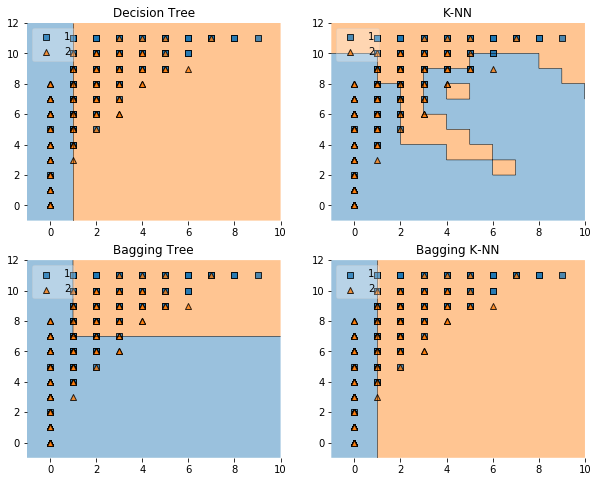

In [9]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), label)    
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

<h4>Boosting</h4>

In [20]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 3, 5, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=5)', 'AdaBoost (n_est=10)']

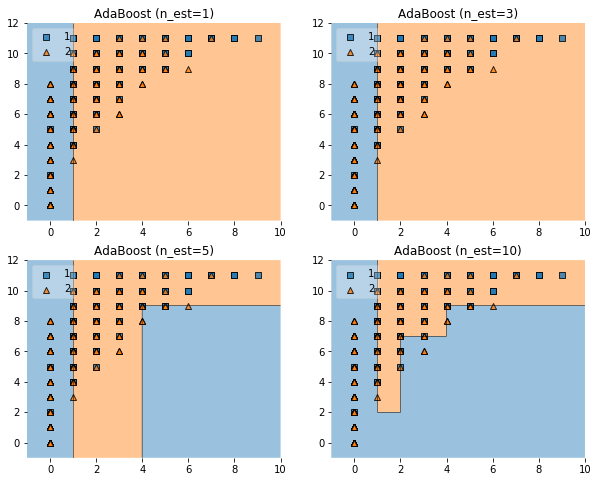

In [21]:
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for n_est, label, grd in zip(num_est, label, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label)

plt.show()

<h4>Stacking</h4>

In [11]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
# clf3 = GaussianNB()
# clf3 = DecisionTreeClassifier()
clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

Accuracy: 0.91 (+/- 0.04) KNN
Accuracy: 0.94 (+/- 0.01) Random Forest
Accuracy: 0.94 (+/- 0.01) neural_network
Accuracy: 0.94 (+/- 0.01) Stacking Classifier


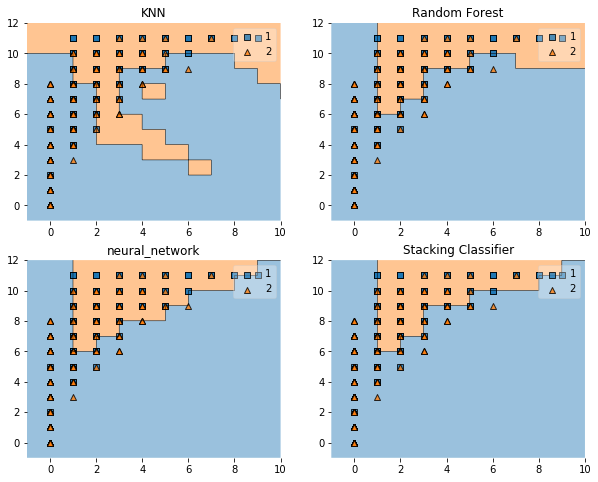

In [12]:
label = ['KNN', 'Random Forest', 'neural_network', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), label) 
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()